<h2> Nama : Nisa Agmi Afifah </h2>
<h2> Dataset : Animal-10.zip </h2>
<h2> Sumber : Kaggle </h2>

In [ ]:
!pip install kaggle



In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"agniafifah","key":"94cd18134fae48dbb96ee52d631850f9"}'}

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


In [ ]:
!kaggle datasets download -d madisona/translated-animals10

 97% 567M/586M [00:06<00:00, 105MB/s]
100% 586M/586M [00:06<00:00, 97.8MB/s]


In [ ]:
# unzip
!mkdir animals
!unzip -qq translated-animals10.zip -d animals
!ls animals


animals10


In [ ]:
!ls animals/animals10/raw-img/


butterfly  cat	chicken  cow  dog  elephant  horse  sheep  spider  squirrel


In [ ]:
import os

animals = os.path.join('/content/animals/animals10/raw-img/')

print(os.listdir(animals))

['chicken', 'cow', 'horse', 'sheep', 'squirrel', 'butterfly', 'cat', 'dog', 'spider', 'elephant']


In [ ]:
import os
import shutil

animals_dir = '/content/animals/animals10/raw-img'  # Adjust this path according to your directory structure
ignore_animals = ['squirrel', 'cat', 'butterfly', 'sheep', 'cow', 'elephant']

for animal in ignore_animals:
    path = os.path.join(animals_dir, animal)

    # Check if the directory exists before trying to remove it
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"Directory '{path}' removed.")
    else:
        print(f"Directory '{path}' does not exist.")


Directory '/content/animals/animals10/raw-img/squirrel' removed.
Directory '/content/animals/animals10/raw-img/cat' removed.
Directory '/content/animals/animals10/raw-img/butterfly' removed.
Directory '/content/animals/animals10/raw-img/sheep' removed.
Directory '/content/animals/animals10/raw-img/cow' removed.
Directory '/content/animals/animals10/raw-img/elephant' removed.


In [ ]:
list_animals = os.listdir(animals)
print(list_animals)

['chicken', 'horse', 'dog', 'spider']


In [ ]:
from PIL import Image
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y

  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

chicken: 3098
- (225, 300)
- (300, 169)
- (261, 300)
- (300, 267)
---------------
horse: 2623
- (300, 225)
- (300, 173)
- (300, 236)
- (300, 251)
---------------
dog: 4863
- (236, 300)
- (300, 245)
- (262, 300)
- (270, 300)
---------------
spider: 4821
- (300, 300)
- (300, 294)
- (300, 280)
- (300, 225)
---------------

Total : 15405


<function matplotlib.pyplot.show(close=None, block=None)>

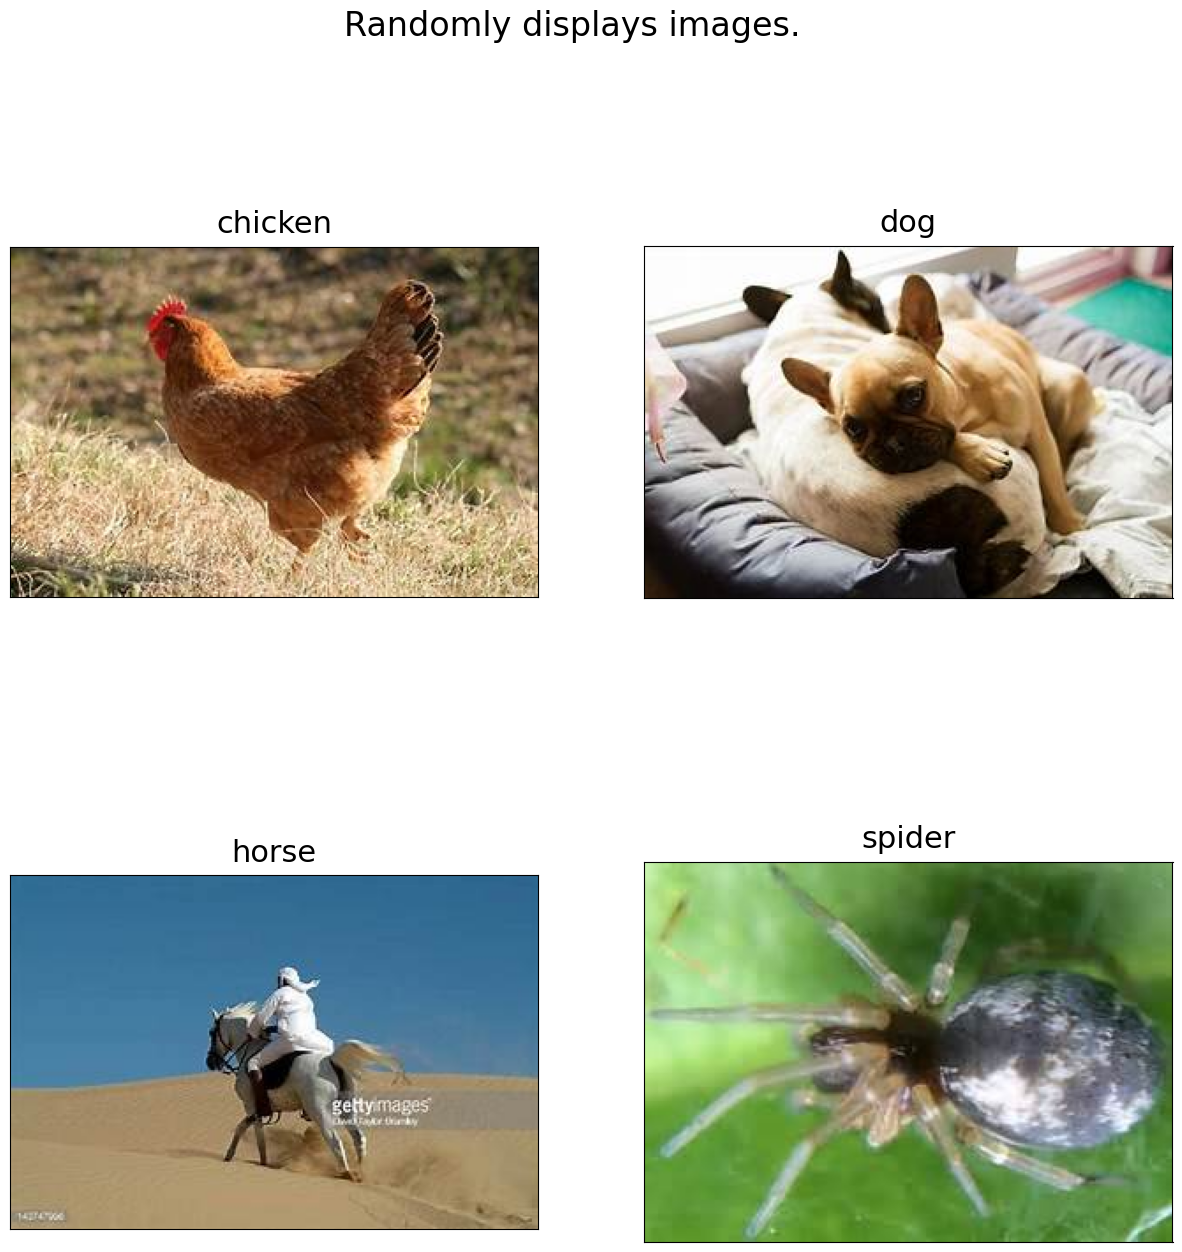

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=24)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id]
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=22)

plt.setp(ax, xticks=[],yticks=[])
plt.show


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [ ]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 12326 images belonging to 4 classes.
Found 3079 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:

history = model.fit(data_train,
                    epochs = 50,
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val,
                    validation_steps

                    = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/50
48/48 [==============================] - 1215s 25s/step - loss: 1.3260 - accuracy: 0.3524 - val_loss: 1.2658 - val_accuracy: 0.4261
Epoch 2/50
32/48 [===================>..........] - ETA: 6:12 - loss: 1.1846 - accuracy: 0.4799

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import warnings
# Menghilangkan Warning
warnings.filterwarnings('ignore')
# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)